In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
data.replace('?',np.nan,inplace=True)
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
for col in ['native.country','workclass','occupation']:
    data[col].fillna(data[col].mode()[0],inplace=True)
    

In [6]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: >

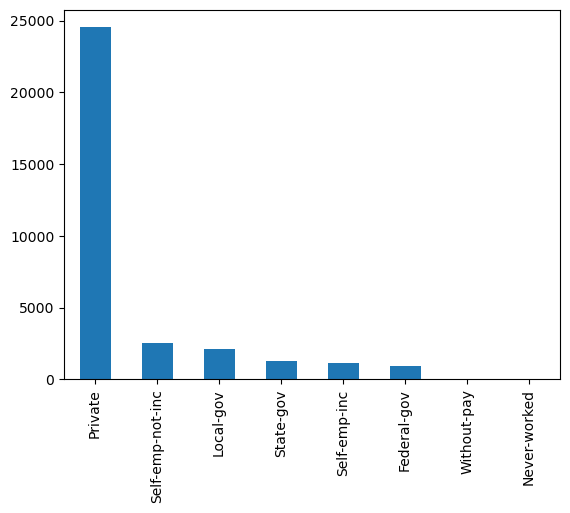

In [10]:
data['workclass'].value_counts().plot(kind='bar')

In [13]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

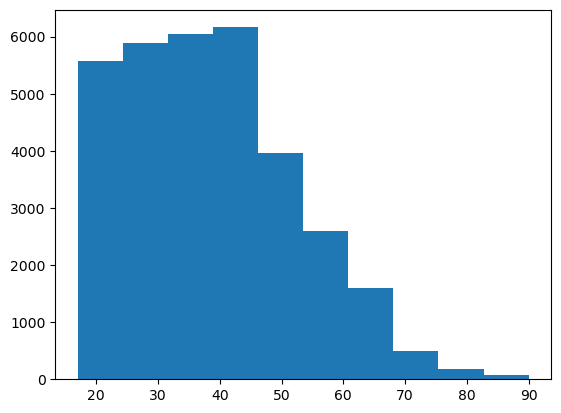

In [14]:
plt.hist(data.age)

<Axes: >

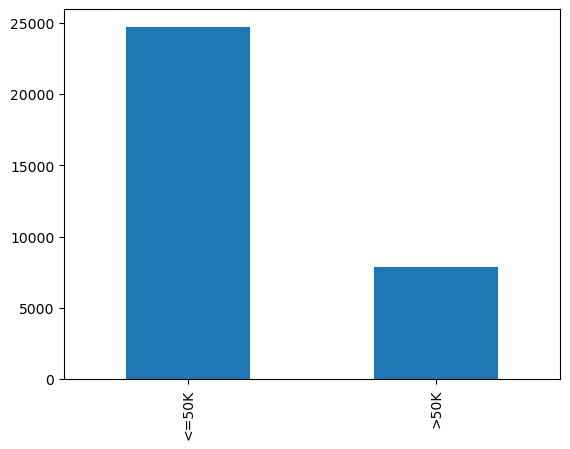

In [16]:
data['income'].value_counts().plot(kind='bar')

In [26]:
edu_num=data.groupby('education').agg({'education.num':'sum'}).sort_values(by='education.num',ascending=True)
edu_income

,education.num
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


C:\Users\hp\AppData\Local\Temp\ipykernel_2596\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

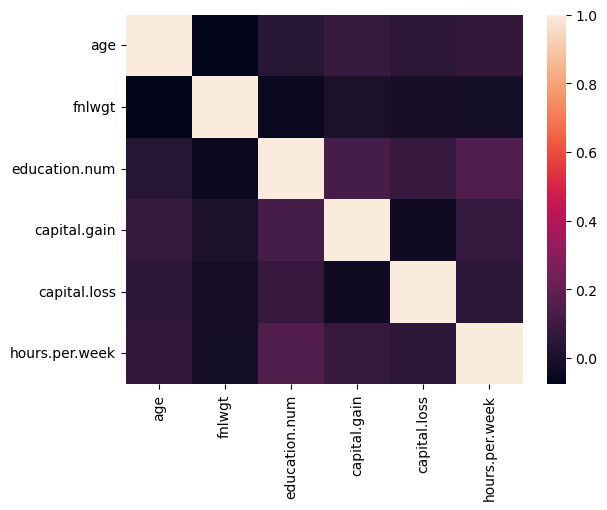

In [28]:
sns.heatmap(data.corr())

In [29]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [30]:
data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [31]:
data['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [32]:
data['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [33]:
data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [37]:
from sklearn.utils import resample

cls_majority=data[data['sex']=='Male']
cls_moirity=data[data['sex']=='Female']

cls_minority_upsample=resample(cls_moirity,
                              replace=True,
                              n_samples=21790,
                              random_state=42)

upsample_data=pd.concat([cls_majority,cls_minority_upsample])

In [40]:
upsample_data['sex'].value_counts()

Male      21790
Female    21790
Name: sex, dtype: int64

In [41]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [42]:
from sklearn.model_selection import train_test_split

x=upsample_data[['age','workclass','fnlwgt','education','marital.status','race','native.country','hours.per.week']]
y=upsample_data['sex']

In [43]:
encoding=OneHotEncoder()
x=encoding.fit_transform(x)

In [45]:
scaler=StandardScaler(with_mean=False)
x=scaler.fit_transform(x)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.3, stratify=y_train, random_state=0)

In [68]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

cv_log_error_array=[]
alpha=[10**x for x in range(-5,1)]

for i in alpha:
    clf=SGDClassifier(alpha=i,penalty='l2',loss='log_loss',random_state=42)
    clf.fit(x_train,y_train)
    
    sig_clas=CalibratedClassifierCV(clf,method='sigmoid')
    sig_clas.fit(x_train,y_train)
    
    pred=sig_clas.predict_proba(x_cv)
    cv_log_error_array.append(log_loss(y_cv,pred,labels=clf.classes_,eps=1e-15))
    
    print('For Values of Alpha =',i,"The Log Loss is:",log_loss(y_cv, pred, labels=clf.classes_, eps=1e-15))
    
    
best_alpha=np.argmin(cv_log_error_array)

clf=SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='log_loss',random_state=42)
clf.fit(x_train,y_train)

lr_sig_clas=CalibratedClassifierCV(clf,method='sigmoid')
lr_sig_clas.fit(x_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For Values of Alpha = 1e-05 The Log Loss is: 0.3588082551557894


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For Values of Alpha = 0.0001 The Log Loss is: 0.3860995176123947


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For Values of Alpha = 0.001 The Log Loss is: 0.33658242646070535


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For Values of Alpha = 0.01 The Log Loss is: 0.28772337370798146


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For Values of Alpha = 0.1 The Log Loss is: 0.28875555699099337


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For Values of Alpha = 1 The Log Loss is: 0.32985396765769714


CalibratedClassifierCV(estimator=SGDClassifier(alpha=0.01, loss='log_loss',
                                               random_state=42))

In [62]:
lr_train_accuracy = (lr_sig_clas.score(x_train, y_train)*100)
lr_test_accuracy = (lr_sig_clas.score(x_test, y_test)*100)
lr_cv_accuracy = (lr_sig_clas.score(x_cv, y_cv)*100)

print("Logistic Regression Train Accuracy -",lr_train_accuracy)
print("Logistic Regression Test Accuracy -",lr_test_accuracy)
print("Logistic Regression CV Accuracy -",lr_cv_accuracy)

Logistic Regression Train Accuracy - 99.64409478317879
Logistic Regression Test Accuracy - 87.37953189536485
Logistic Regression CV Accuracy - 87.56555944055944


In [71]:
y_train_pred=lr_sig_clas.predict(x_train)
y_tets_pred=lr_sig_clas.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

accuracy_gap = train_accuracy - test_accuracy

In [72]:
accuracy_gap

0.12264562887813946